# Study of the Phase transition in the 2nn Ising Model by using DMRG

#### Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np

##### Data

In [14]:
hs=np.linspace(1,7.5,14)
hs=np.append(hs,5.43656365691809)
#hs=[5.358785879140313,5.381008101362535,5.403230323584758,5.425452545806979,5.447674768029201,5.469896990251423,5.53656365691809]
#np.delete(hs,10)
#hs=[5.44]
ls=[256]

z_l=[]

x={}
corr={}
for l in ls: 
    z={}
    
    for h in hs:
        print(l,h)
        data = np.load(f"data/check_the_2nn_phase_transition/051222/test_obc_{l}_l_{h}_h_100_n.npz")
        z[h] = data["density"]
        corr[(l,h)] = data["correlation"]
        x[(l,h)]=data['magnetization_x']
        
    z_l.append(z)


256 1.0
256 1.5
256 2.0
256 2.5
256 3.0
256 3.5
256 4.0
256 4.5
256 5.0
256 5.5
256 6.0
256 6.5
256 7.0
256 7.5
256 5.43656365691809


 #### Plots

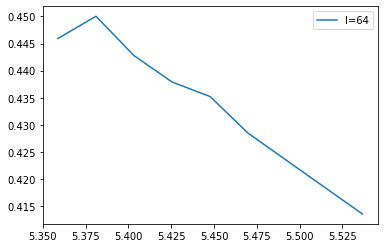

In [37]:
for l in ls:
    chi=[]
    for h in hs:
        chi.append(np.average((corr[(l,h)])))

    plt.plot(np.sort(hs),chi,label=f'l={l}')
plt.legend()
plt.show()

#### Critical behaviour

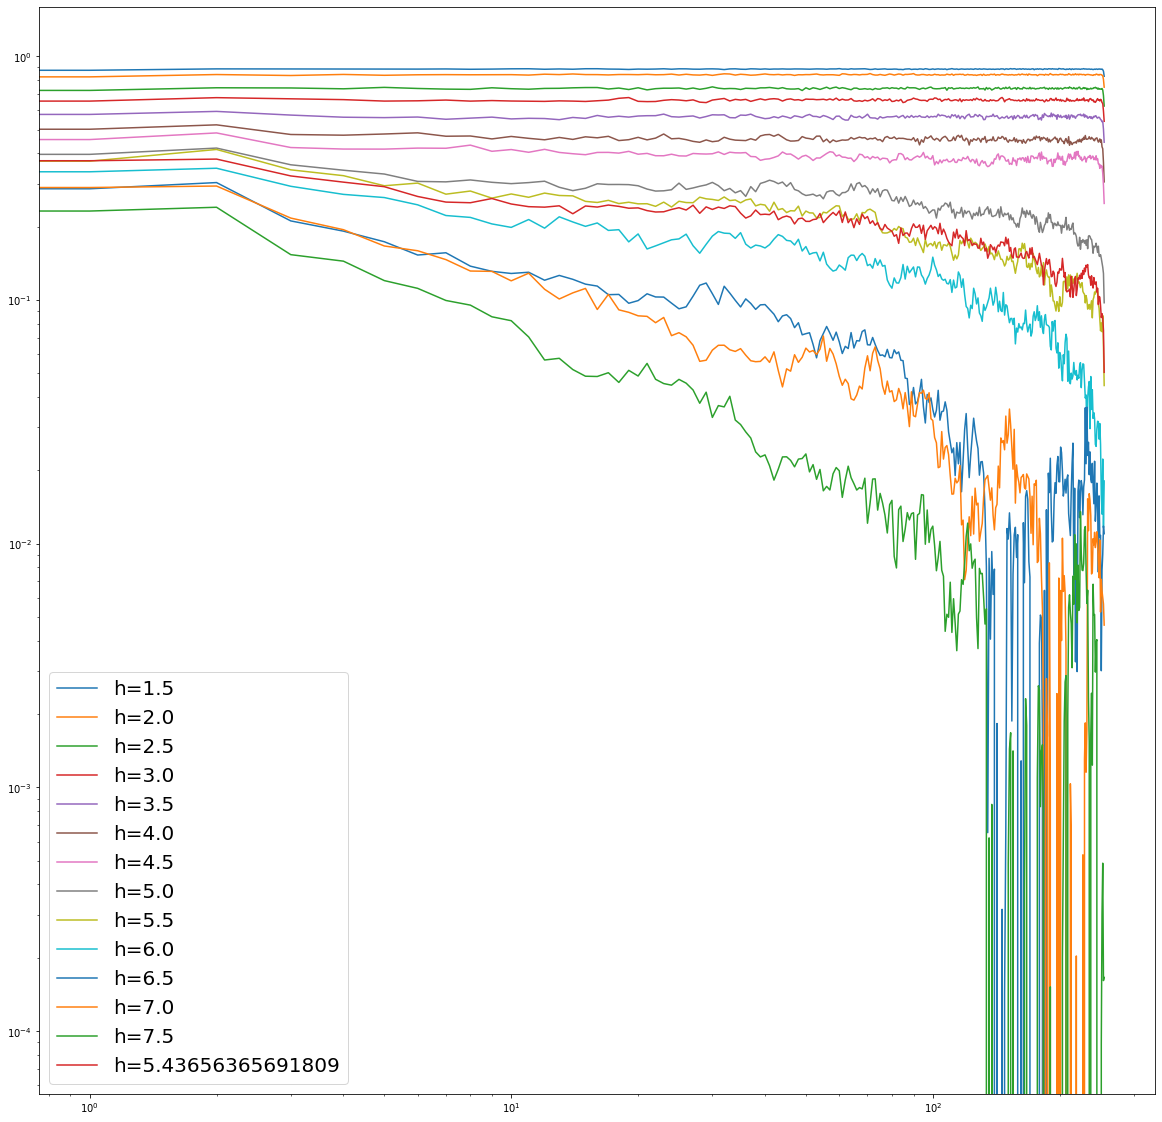

In [15]:
for l in ls:
    plt.figure(figsize=(20,20))
    for h in hs:
    
        if h!=1.0:
            xx=np.average(corr[(l,h)],axis=0)
            plt.plot(xx[0,:],label=f'h={h}')
    plt.legend(fontsize=20)
    plt.loglog()
    plt.show()

(1000, 64, 64)
(1000, 64, 64)
(1000, 64, 64)
(1000, 64, 64)
(1000, 64, 64)
(1000, 64, 64)
(1000, 64, 64)


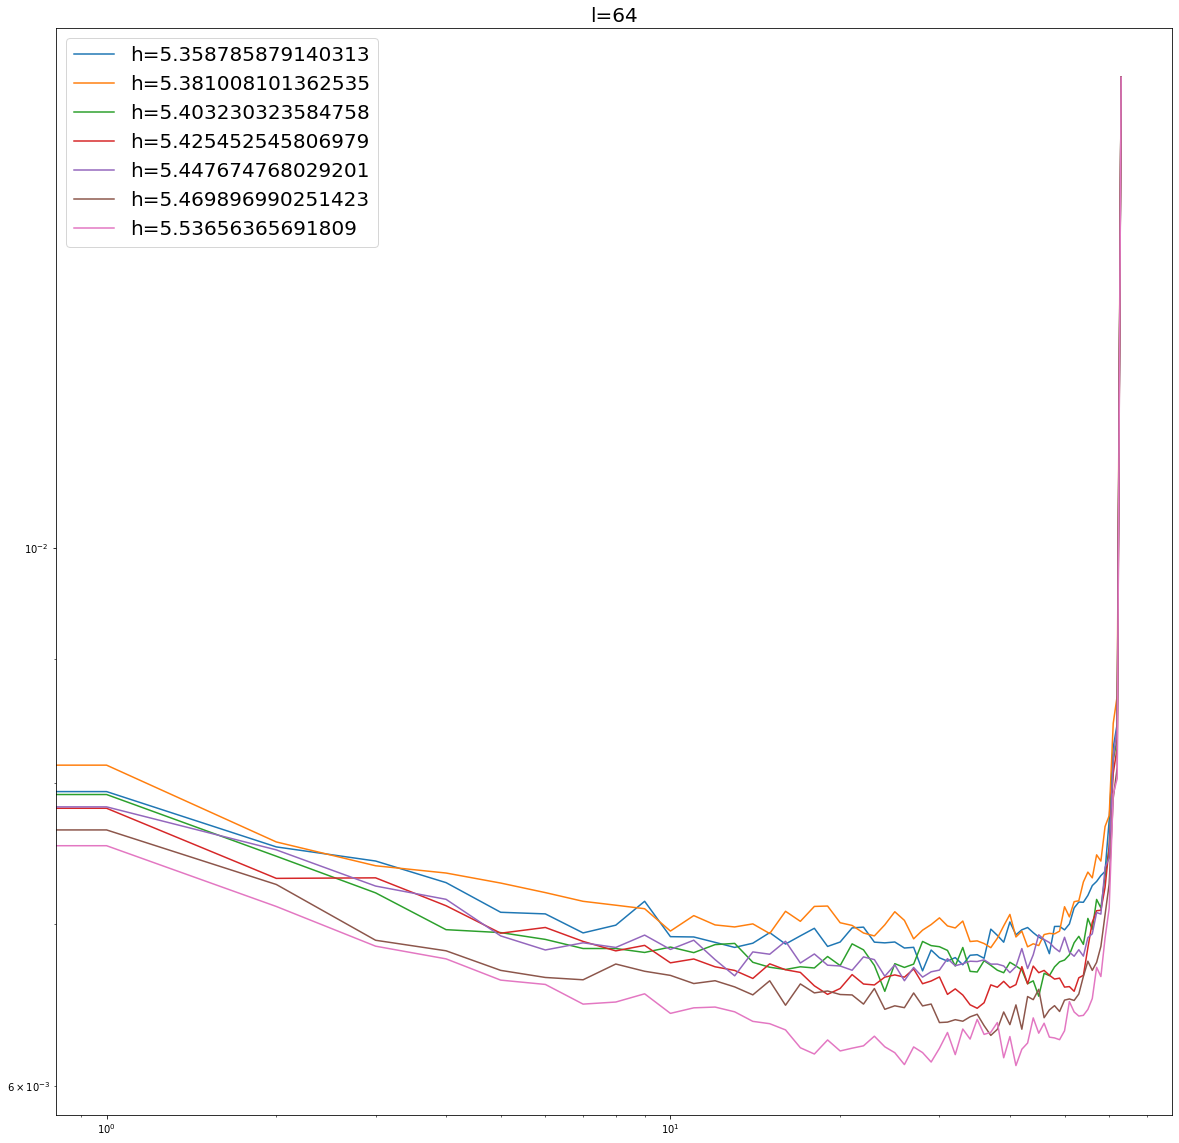

In [42]:
for i in range(len(ls)):
    plt.figure(figsize=(20,20))
    for h in hs:
        idx=np.arange(ls[i])
        xx=corr[(ls[i],h)]
        print(xx.shape)
        g=np.zeros((xx.shape[0],ls[i]))
        for p in range(ls[i]):
            for r in range(p,ls[i]):
                g[:,p] = +xx[:,p,(r)]
        plt.plot(idx,np.average(g/ls[i],axis=0),label=f'h={h}')
    
    plt.legend(fontsize=20)
    plt.title(f'l={ls[i]}',fontsize=20)
    plt.loglog()
    plt.show()
                

## Study the Binder Cumulant

#### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from src.utils_sparse_diag import binder_cumulant_computation

#### Data

In [ ]:
h_c=5.43656365691809
h_max=[h_c-0.5,h_c-0.25,h_c,h_c+0.25,h_c+0.5]
#h_max=[h_c-0.1 + 0.01*f for f in range(1,10)]
#h_max=np.load('data/coordinates_hmax_binder_cumulator_constant_field_151222.npz')['hmax']
h_max=[3.5,3.75,4.0,4.25,4.5,4.75,5.0,5.25,5.44,5.5,5.75,6.0,6.25,6.5,6.75,7.0]
#h_max=[h_c-1.1+0.1*f for f in range(1,21)]+[6.25,6.5,6.75,7.0]
h_max=[h_c-1.1+0.1*f for f in range(1,30)]
ls=[16,24,32]
u={}
plt.figure(figsize=(10,10))
for l in ls:
    for h in h_max:
        data=np.load(f'data/check_the_2nn_phase_transition/221222/binder_cumulant_periodic_2nn_{l}_l_{h}_h_100_n.npz')
        m_4=data['m4']
        m_2=data['m2']
        m_4=np.average(m_4,axis=0)
        m_2=np.average(m_2,axis=0)
        u[(l,h)]=(3-(m_4/((m_2)**2)))/2
        #u[(l,h)]=(1-(m_4/((3*m_2)**2)))
        
        #u[(l,h)]=data['u']


for l in ls:
    plt.plot(h_max,[np.average(u[(l,h)]) for h in h_max],label=f'l={l}')
#plt.axvline(x=6.25,label='critical')
plt.legend(fontsize=20)
plt.show()

In [ ]:
for l in ls:
    plt.plot(h_max,[np.average(u[(l,h)]) for h in h_max])
plt.show()
    

## Binder cumulant with Quspin

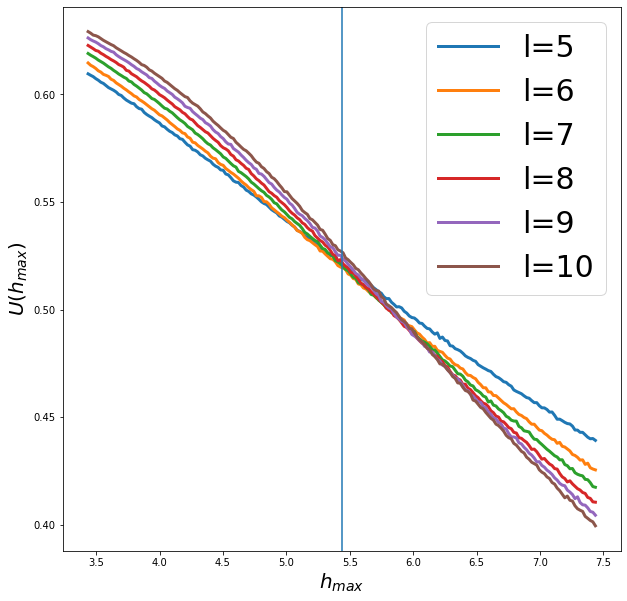

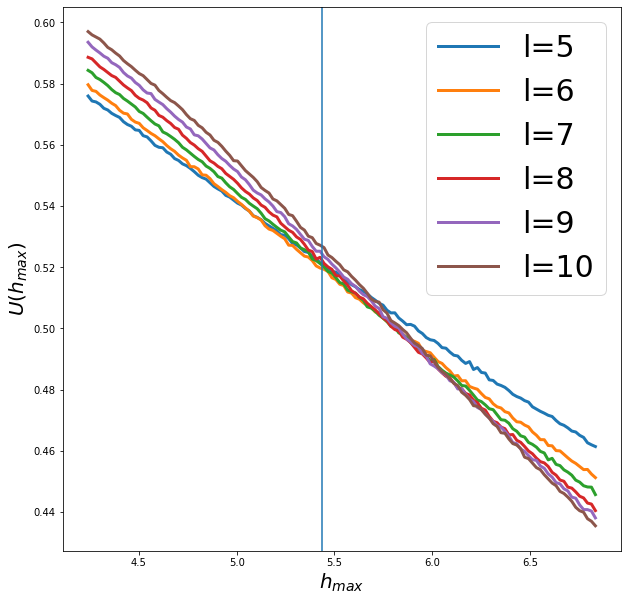

In [2]:
data=np.load('data/check_the_2nn_phase_transition/221222/binder_cumulant_range_h_3.44-7.44_range_l_5-14.npz',allow_pickle=True)

h_max=data['hmax']
ls=data['ls']
ls=[5,6,7,8,9,10]
u=data['u']
u=dict(u.item())

plt.figure(figsize=(10,10))
for l in ls:
    plt.plot(h_max,[np.average(u[(l,h)]) for h in h_max],label=f'l={l}',linewidth=3)
plt.axvline(x=5.44)
plt.xlabel(r'$h_{max}$',fontsize=20)
plt.ylabel(r'$U(h_{max})$',fontsize=20)
plt.legend(fontsize=30)
plt.show()


plt.figure(figsize=(10,10))
for l in ls:
    plt.plot(h_max[40:-30],[np.average(u[(l,h)]) for h in h_max[40:-30]],label=f'l={l}',linewidth=3)
plt.axvline(x=2*np.e)
plt.legend(fontsize=30)
plt.xlabel(r'$h_{max}$',fontsize=20)
plt.ylabel(r'$U(h_{max})$',fontsize=20)
plt.show()

#u=np.asarray([np.average(u[10,h]) for h in h_max])

# print(u.shape)
# np.savetxt('data/binder_cumulant_value_l_10.dat',u)
# np.savetxt('data/h_max.dat',h_max)
